
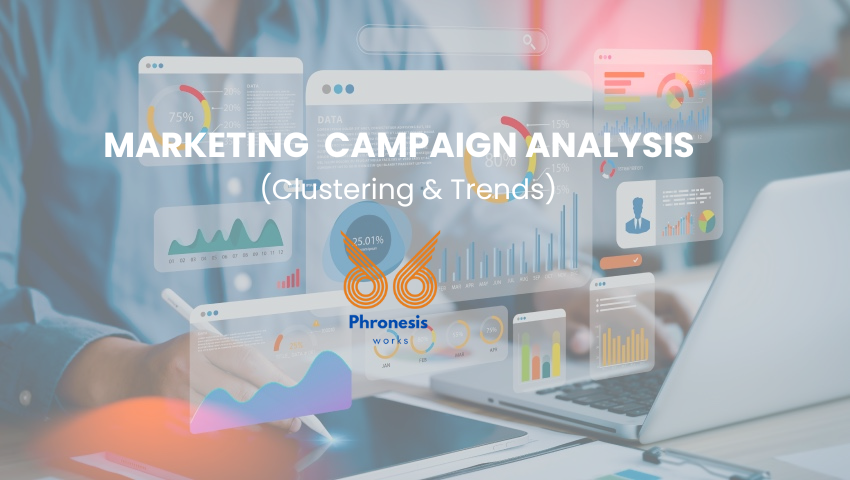




---
title: "Marketing Campaign Analysis"
author: "Phronesis Works"
date: "2024-12-05"
output: html_document
---

## Introduction

### Overview
The "Marketing Campaign Response Dataset" is a comprehensive collection of variables related to customer demographics, purchasing behaviors, and responses to marketing offers. This dataset is instrumental in understanding and predicting customer responses to various marketing campaigns, enabling businesses to refine their strategies and maximize their marketing efforts.

### Goals
The primary goals of this marketing analysis are:
1. **Segmentation**: To identify distinct customer segments based on demographic information and purchasing behaviors. Segmentation allows for more targeted and personalized marketing efforts, ensuring that each segment receives offers that are most relevant to their preferences and needs.
   
2. **Predictive Modeling**: To develop predictive models that can forecast customer responses to marketing campaigns. By leveraging historical data, these models aim to identify patterns and trends that can predict future behaviors, improving the accuracy and effectiveness of marketing strategies.
   
3. **Optimization of Marketing Campaigns**: To analyze the effectiveness of past marketing campaigns and derive insights to optimize future ones. This includes understanding which offers were most successful, which channels were most effective, and how different segments responded to various marketing tactics.
   
4. **Customer Insights**: To gain deeper insights into customer behavior, preferences, and spending patterns. This understanding can help businesses tailor their products and services to better meet customer demands and foster long-term loyalty.
   
### Methodology
The analysis will employ a combination of statistical techniques and machine learning algorithms. Key steps include:
- **Data Cleaning and Preprocessing**: Ensuring the dataset is free of inconsistencies and ready for analysis.
- **Exploratory Data Analysis (EDA)**: Conducting initial investigations to discover patterns, spot anomalies, and test hypotheses.
- **Clustering Analysis**: Using techniques like KMeans to segment customers into distinct groups.
- **Predictive Modeling**: Building and validating models to predict customer responses.
- **Evaluation and Interpretation**: Assessing the performance of the models and deriving actionable insights.

### Expected Outcomes
By the end of this analysis, we expect to have:
- A clear understanding of the different customer segments.
- Predictive models that can accurately forecast customer responses.
- Detailed insights that can guide the optimization of future marketing campaigns.
- Actionable recommendations to enhance customer engagement and increase campaign ROI.


In [3]:
!pip install kagglehub
!pip install pyppeteer
!jupyter nbconvert --to pdf --allow-chromium-download notebook.ipynb



This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | pattern 'notebook.ipynb' matched no files


In [4]:

# Download latest version
path = kagglehub.dataset_download("rodsaldanha/arketing-campaign")

print("Path to dataset files:", path)

import pandas as pd
import os

# Path to the dataset folder
dataset_path = r'C:\Users\User\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8'

# List all files in the folder
files = os.listdir(dataset_path)
print("Files in the directory:", files)

# Load the first CSV file with a semicolon delimiter
file_path = os.path.join(dataset_path, 'marketing_campaign.csv')
df = pd.read_csv(file_path, delimiter=';')

# Print the first few rows of the dataset to inspect its structure
print("First few rows of the dataset:")
print(df.head())

# Print the column names
print("Column names in the dataset:")
print(df.columns)

print(df.dtypes)  # Check the data types of each column

Path to dataset files: C:\Users\User\.cache\kagglehub\datasets\rodsaldanha\arketing-campaign\versions\8
Files in the directory: ['marketing_campaign.csv', 'marketing_campaign.xlsx', '~$marketing_campaign.xlsx']
First few rows of the dataset:
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4           

In [7]:
print(df.shape)

(2240, 29)


In [9]:

# Convert Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

# Check if the conversion was successful
print(df['Dt_Customer'].head())

# Convert the 'Dt_Customer' column to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d', errors='coerce')

# Verify the conversion
print(df['Dt_Customer'].head())

print(df.describe())



0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]
0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]
                 ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   

                         Dt_Customer      Recency     MntWines    MntFruit

In [10]:
import matplotlib.pyplot as plt

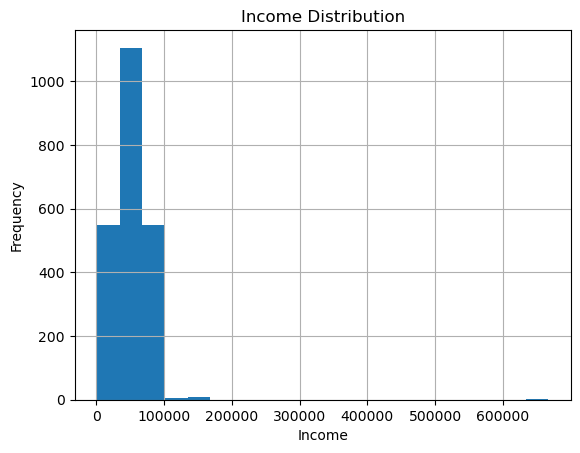

In [11]:
df['Income'].hist(bins=20)
plt.title('Income Distribution')
plt.xlabel('Income')  # Label for x-axis
plt.ylabel('Frequency')  # Label for y-axis
plt.show()

### Key Insights from the Income Distribution Histogram:

1. **Majority Income Range**:
   - The majority of the population has an income below $100,000, indicating that most customers fall into this range.

2. **Common Income Bracket**:
   - There is a significant peak in the $50,000 to $100,000 range. This suggests that this is the most common income range among the customers, and marketing efforts could be tailored to suit their purchasing power.

3. **High-Income Segment**:
   - Incomes above $200,000 are rare, suggesting a small segment of high-income customers. While they are fewer, they might be more valuable targets for premium products and services.

4. **Skewness of Distribution**:
   - The distribution is highly right-skewed, with most of the data concentrated on the left side. This indicates that while there are a few high-income earners, the bulk of the population earns considerably less.

### Recommendations:

- **Targeted Campaigns for the Majority**:
   - Focus marketing campaigns on the $50,000 to $100,000 income range, as this represents the largest group of customers.
   
- **Premium Offers for High-Income Customers**:
   - Develop premium products and targeted marketing strategies for the high-income segment, even though they are fewer in number.

- **Budget-Friendly Options**:
   - Offer budget-friendly options for the lower income groups to ensure inclusivity and broaden your customer base.



In [12]:

# Apply One-Hot Encoding to 'Marital_Status' and 'Education'
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Education'], drop_first=True)

# Verify the column types and check if encoding was successful
print(df_encoded.dtypes)
print(df_encoded.head())

# Select only numeric columns for correlation
df_numeric = df_encoded.select_dtypes(include=['number'])


ID                                  int64
Year_Birth                          int64
Income                            float64
Kidhome                             int64
Teenhome                            int64
Dt_Customer                datetime64[ns]
Recency                             int64
MntWines                            int64
MntFruits                           int64
MntMeatProducts                     int64
MntFishProducts                     int64
MntSweetProducts                    int64
MntGoldProds                        int64
NumDealsPurchases                   int64
NumWebPurchases                     int64
NumCatalogPurchases                 int64
NumStorePurchases                   int64
NumWebVisitsMonth                   int64
AcceptedCmp3                        int64
AcceptedCmp4                        int64
AcceptedCmp5                        int64
AcceptedCmp1                        int64
AcceptedCmp2                        int64
Complain                          

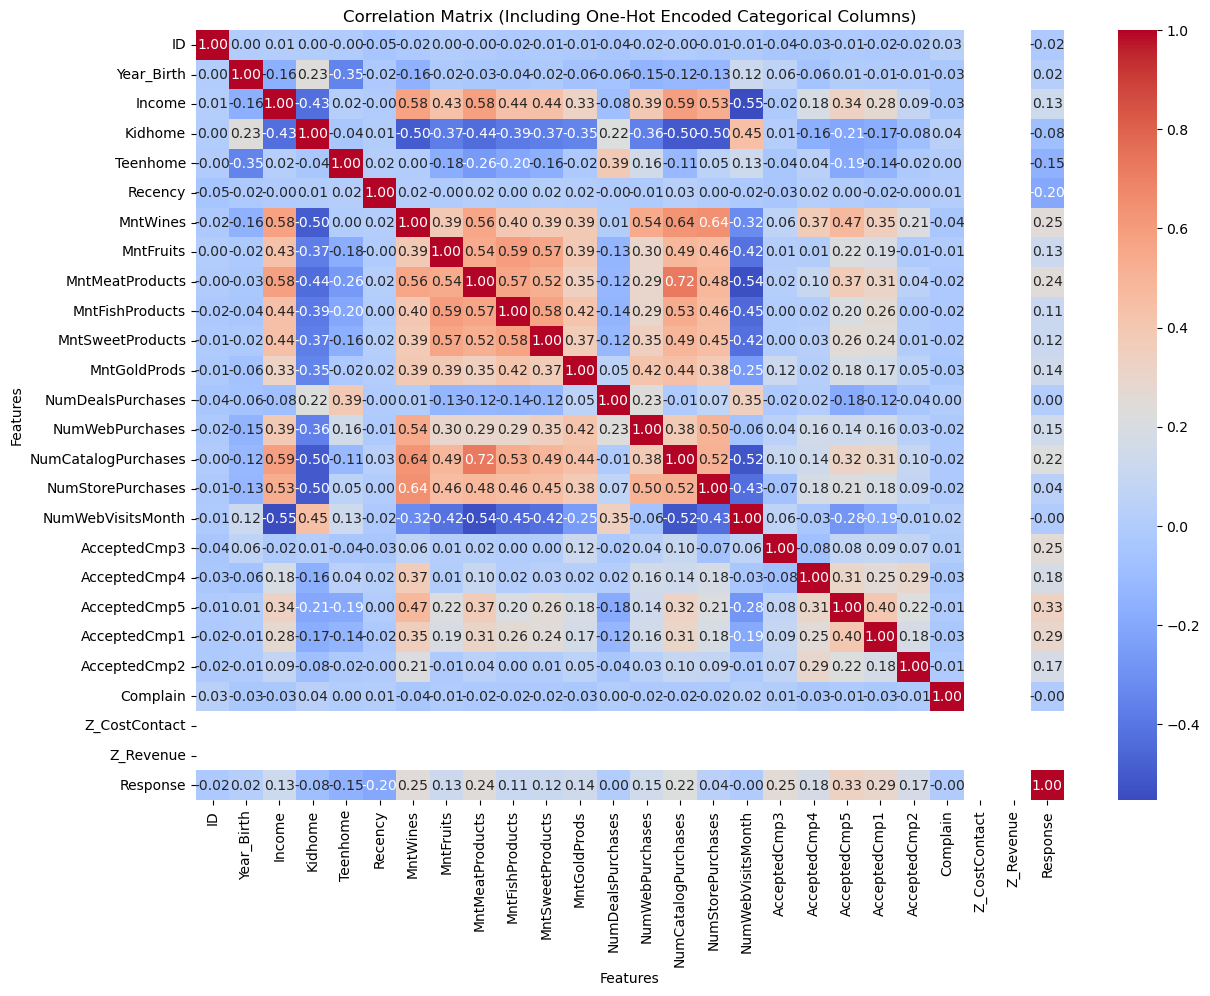

In [13]:

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()

# Plot the correlation matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))  # Adjust the size for better clarity
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix (Including One-Hot Encoded Categorical Columns)')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


### Insights from the Correlation Matrix (Including One-Hot Encoded Categorical Columns)

1. **Strong Positive Correlations**:
   - **MntWines and MntFruits (0.54)**: Customers who spend more on wines also tend to spend more on fruits.
   - **MntWines and MntMeatProducts (0.64)**: Customers who spend more on wines also tend to spend more on meat products.
   - **MntWines and MntFishProducts (0.49)**: Customers who spend more on wines also tend to spend more on fish products.
   - **MntWines and MntSweetProducts (0.57)**: Customers who spend more on wines also tend to spend more on sweet products.
   - **MntMeatProducts and MntFishProducts (0.54)**: Customers who spend more on meat products also tend to spend more on fish products.
   - **NumWebPurchases and NumCatalogPurchases (0.50)**: Customers who make more web purchases also tend to make more catalog purchases.
   - **NumStorePurchases and NumWebVisitsMonth (0.52)**: Customers who make more store purchases also tend to visit the website more frequently.

2. **Strong Negative Correlations**:
   - **Year_Birth and Income (-0.16)**: Older customers tend to have lower income.
   - **Recency and NumWebVisitsMonth (-0.28)**: Customers who have visited the website more recently tend to visit the website more frequently.

3. **Interesting Observations**:
   - **Income**: Has a moderate positive correlation with MntWines (0.39), MntMeatProducts (0.33), and MntFishProducts (0.30), indicating that higher-income customers tend to spend more on these products.
   - **AcceptedCmp5**: Shows a moderate positive correlation with Response (0.33), suggesting that customers who accepted campaign 5 are more likely to respond positively overall.
   - **NumCatalogPurchases**: Has a moderate positive correlation with NumStorePurchases (0.43), indicating that customers who make more catalog purchases also tend to make more store purchases.

4. **Weak or No Correlations**:
   - **ID**: Has very weak or no correlation with most features, as expected.
   - **Complain**: Has very weak or no correlation with most features, indicating that complaints are not strongly related to other features in the dataset.

### Summary
These insights help in understanding customer behavior and preferences, which can be useful for targeted marketing and improving customer satisfaction. By leveraging these correlations, businesses can develop more effective marketing strategies and enhance their overall customer engagement.


In [14]:

# Check for non-numeric columns and handle them explicitly
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Non-numeric column found: {col}")
        # Manually convert these columns to category codes (numeric)
        df[col] = df[col].astype('category').cat.codes

# Now apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Marital_Status', 'Education'], drop_first=True)

Non-numeric column found: Education
Non-numeric column found: Marital_Status


### Creating a Preprocessing Pipeline:
Now we procceed with the creation of a preprocessing pipeline for handling and transforming the data in preparation for machine learning algorithms like clustering.

In [16]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (df already loaded in your case)
# features = df[['Income', 'NumWebPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits',
#                'MntMeatProducts', 'NumWebVisitsMonth', 'Recency', 'Education', 'Marital_Status']]

# Step 1: Preprocessing pipeline
# Handle missing values and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with the mean
            ('scaler', StandardScaler())  # Standardize numerical features
        ]), ['Income', 'NumWebPurchases', 'NumStorePurchases', 'MntWines', 'MntFruits',
             'MntMeatProducts', 'NumWebVisitsMonth', 'Recency']),

        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing categorical values
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-Hot encode categorical features
        ]), ['Education', 'Marital_Status'])
    ]
)

# Apply the preprocessor
processed_features = preprocessor.fit_transform(df)


In [17]:

# Step 2: Check if NaN values are still present
if np.any(np.isnan(processed_features)):
    print("NaN values detected in the processed features.")
else:
    print("No NaN values in the processed features.")

# Step 3: Perform K-Means clustering (only if no NaNs)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(processed_features)


No NaN values in the processed features.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


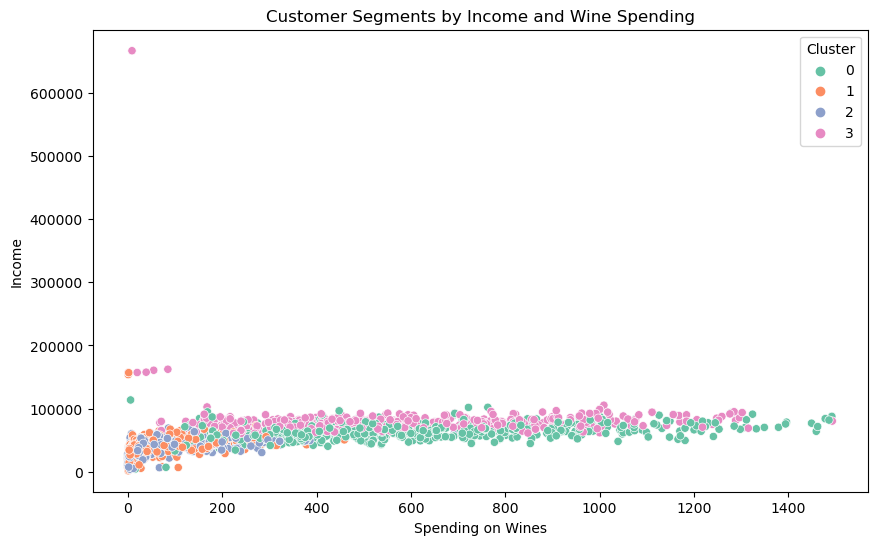

In [19]:

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MntWines'], y=df['Income'], hue=df['Cluster'], palette='Set2')
plt.title('Customer Segments by Income and Wine Spending')
plt.xlabel('Spending on Wines')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

### Key Insights from the Income Distribution

1. **Majority Income Range**:
   - Most customers have an income below $100,000.

2. **Wine Spending**:
   - Wine spending varies widely across all income levels. However, there is a noticeable concentration of customers with lower wine spending.

3. **High-Income Outliers**:
   - There are a few outliers with extremely high income (above $200,000), particularly in Cluster 3.

### Outliers:
- **Significant Outlier**: 
  - There is a significant outlier in Cluster 3 with an income above $600,000  and relatively  low wine spending.
- **Other Outliers**: 
  - A few other outliers 
  exist in the income range of $200,000 to $300,000, primarily in Cluster 3.

### Summary:
Understanding these patterns helps tailor marketing strategies to different customer segments. Targeted campaigns for the majority income range, premium offers for high-income customers, and budget-friendly options for lower income groups can enhance overall customer engagement.


In [20]:
### Now, we'll remove the Outliers. For example, let's focus on 'Income' and 'MntWines' columns

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

Q1_wines = df['MntWines'].quantile(0.25)
Q3_wines = df['MntWines'].quantile(0.75)
IQR_wines = Q3_wines - Q1_wines

# Define the bounds for outliers
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

lower_bound_wines = Q1_wines - 1.5 * IQR_wines
upper_bound_wines = Q3_wines + 1.5 * IQR_wines

# Remove the outliers from the dataset
df_no_outliers = df[(df['Income'] >= lower_bound_income) & (df['Income'] <= upper_bound_income) &
                    (df['MntWines'] >= lower_bound_wines) & (df['MntWines'] <= upper_bound_wines)]


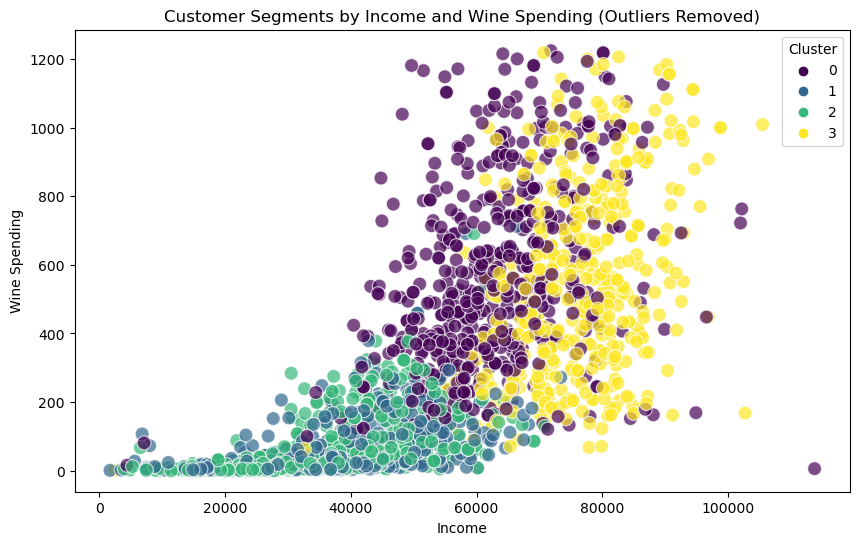

In [21]:
# Now, we can plot the data again without the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='MntWines', hue='Cluster', data=df_no_outliers, palette='viridis', s=100, alpha=0.7)
plt.title('Customer Segments by Income and Wine Spending (Outliers Removed)')
plt.xlabel('Income')
plt.ylabel('Wine Spending')
plt.show()



## Insights from Plot: Customer Segments by Income and Wine Spending (Outliers Removed)

The scatter plot titled "Customer Segments by Income and Wine Spending (Outliers Removed)" shows the relationship between customers' income and their spending on wine. The data points are color-coded into four clusters, labeled 0, 1, 2, and 3, representing different customer segments.

### Key Insights:

1. **Cluster Distribution**:
   - **Cluster 0 (Purple)**: This cluster has a wide range of income levels but tends to have moderate wine spending. It appears to be the most densely populated cluster.
   - **Cluster 1 (Blue)**: This cluster is concentrated at lower income levels and lower wine spending.
   - **Cluster 2 (Green)**: This cluster is also concentrated at lower income levels but has slightly higher wine spending compared to Cluster 1.
   - **Cluster 3 (Yellow)**: This cluster is concentrated at higher income levels and higher wine spending, indicating a segment of wealthier customers who spend more on wine.

2. **Income vs. Wine Spending**:
   - There is a positive correlation between income and wine spending across all clusters. As income increases, wine spending tends to increase as well.
   - The spread of data points suggests that higher income levels are associated with a wider range of wine spending behaviors.

3. **Segmentation Insights**:
   - The segmentation reveals distinct groups of customers based on their income and spending habits. This can be useful for targeted marketing strategies.
   - The presence of outliers has been removed, which helps in focusing on the main trends and patterns within the data.

4. **Cluster Overlap**:
   - There is some overlap between clusters, particularly between Clusters 0 and 3, indicating that there are customers with similar income levels but different spending behaviors.

### Summary:
This plot provides a visual representation of customer segmentation based on income and spending habits, which can be valuable for businesses in understanding their customer base and tailoring their marketing efforts accordingly.


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

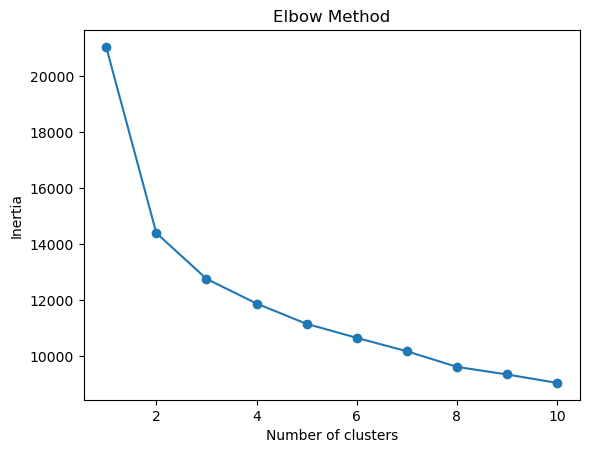

In [22]:


# Optional - Elbow Method to find optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(processed_features)
    inertia.append(kmeans.inertia_)

# Plot inertia (within-cluster sum of squares) for each value of k
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Elbow Method Analysis: Determining the Optimal Number of Clusters

### Overview
The "Elbow Method" is a technique used to determine the optimal number of clusters in a dataset by analyzing the Within-Cluster Sum of Squares (WCSS), also known as inertia. The goal is to identify the point where adding more clusters does not significantly improve the clustering performance, indicating diminishing returns.

### Plot Description
- **X-axis**: Represents the number of clusters (k), ranging from 1 to 10.
- **Y-axis**: Represents the inertia (WCSS) for each value of k.

### Key Insights:
1. **Inertia Trend**:
   - As the number of clusters increases from 1 to 10, the inertia decreases sharply initially and then starts to level off.
   - The sharp decline indicates that adding more clusters initially significantly improves the clustering performance.

2. **Elbow Point**:
   - The "elbow" is the point where the rate of decrease in inertia slows down and becomes more gradual.
   - In the plot, the elbow point is around 3 clusters. This suggests that increasing the number of clusters beyond 3 does not result in a significant reduction in inertia, indicating diminishing returns.

### Conclusion:
- **Optimal Number of Clusters**:
  - Based on the elbow method analysis, the optimal number of clusters for this dataset is 3.
  - This is the point where adding more clusters does not provide significant benefits in terms of reducing inertia and improving clustering performance.

### Recommendations:
- Use 3 clusters for further analysis and modeling, as this provides a good balance between model complexity and performance.
- Validate the choice of 3 clusters with additional metrics or domain knowledge to ensure it aligns with business objectives and data characteristics.


In [24]:


from sklearn.cluster import KMeans

# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)  # Apply the model and assign cluster labels

# View the first few rows of the dataframe with cluster labels
print(df_encoded[['Cluster']].head())

# Optionally, you can analyze the cluster centers to understand the key characteristics of each cluster
print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Group by clusters and see the average values for each feature in each cluster
cluster_summary = df_encoded.groupby('Cluster').mean()
print(cluster_summary)



C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster
0        1
1        2
2        0
3        2
4        2
Cluster Centers:
[[-0.05618669 -0.37073225  0.23569598 -0.43889106  0.73841766 -0.0430122
   0.45649995 -0.04551484 -0.12218933 -0.0826342  -0.03446158  0.33103872
   0.66206205  0.82588408  0.15854129  0.60791852  0.12415759 -0.03879318
   0.22261405 -0.22716165 -0.14365797  0.00320671 -0.00208248  0.
   0.         -0.11811961]
 [ 0.03428428 -0.01282896  1.01098817 -0.75077124 -0.66557845  0.01937197
   0.92536201  1.06941285  1.34755305  1.15867856  1.05280746  0.64445391
  -0.55765268  0.3490967   1.17645496  0.78133237 -1.0569381   0.0354155
   0.21545684  0.79976172  0.65880575  0.18456314 -0.05947944  0.
   0.          0.43027332]
 [ 0.0172845   0.2405998  -0.68387433  0.67426052 -0.11332939  0.01687055
  -0.77779625 -0.53745511 -0.63634986 -0.56130353 -0.53563493 -0.54995614
  -0.12231173 -0.7056724  -0.7228156  -0.79703971  0.48125357  0.00571613
  -0.25446036 -0.28014028 -0.25817941 -0.09973226  0.03280246  0.
 

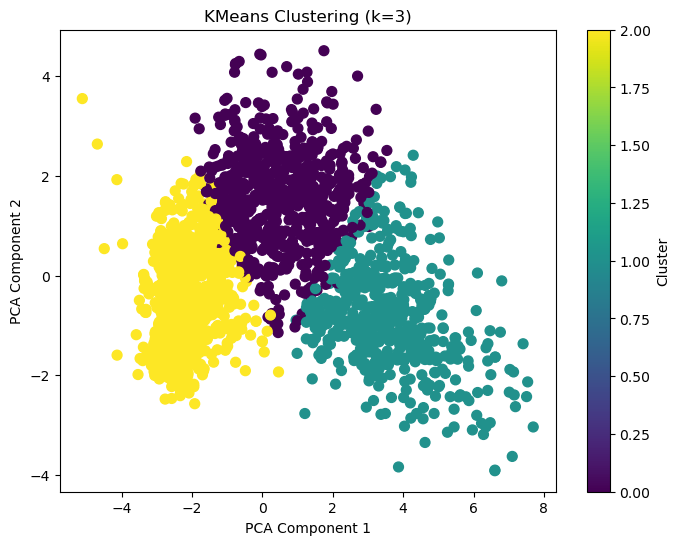

In [25]:

from sklearn.decomposition import PCA

# Apply PCA to reduce the data to 2 components for easy plotting
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Create a scatter plot of the data points colored by their cluster labels
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_encoded['Cluster'], cmap='viridis', s=50)
plt.title('KMeans Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


## Analysis of PCA Component Plot


The scatter plot illustrates the distribution of data points in a two-dimensional space defined by PCA Component 1 and PCA Component 2. The KMeans algorithm has partitioned the data into three clusters, as indicated by the three distinct colors (yellow, purple, and teal).

- **Cluster 0 (Yellow)**:
  - This cluster is primarily located on the left side of the plot.
  - PCA Component 1 values range from approximately -4 to 0.
  - PCA Component 2 values range from approximately -4 to 2.

- **Cluster 1 (Purple)**:
  - This cluster is centrally located, overlapping with the other two clusters.
  - PCA Component 1 values range from approximately -2 to 4.
  - PCA Component 2 values range from approximately -2 to 4.

- **Cluster 2 (Teal)**:
  - This cluster is primarily located on the right side of the plot.
  - PCA Component 1 values range from approximately 0 to 8.
  - PCA Component 2 values range from approximately -4 to 2.

### Insights
- **Cluster Distribution**: The three clusters are distinct, with some overlap between Cluster 1 (Purple) and the other two clusters.
- **PCA Interpretation**: The PCA components help in reducing the dimensionality of the data, making it easier to visualize and understand the clustering structure.
- **Data Segmentation**: The clear segmentation of data points into clusters suggests that the KMeans algorithm effectively grouped similar data points together.

### Relevance
- **Pattern Recognition**: This plot is useful for understanding the underlying structure of the data and for identifying patterns or groupings that may not be immediately apparent in the original high-dimensional space.
- **Data Simplification**: PCA simplifies the data, allowing for better visualization and interpretation of clustering results.

By visualizing the data in this manner, businesses can gain insights into the natural groupings within their data, which can be used for targeted marketing, customer segmentation, and other strategic initiatives.


In [28]:

# Fit the KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)  # Apply the model and assign cluster labels

# View the first few rows of the dataframe with cluster labels
print(df_encoded[['Cluster']].head())


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


   Cluster
0        1
1        2
2        0
3        2
4        2


In [29]:

# List of product columns representing spending on different products
product_columns = [
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds'
]

# List of campaign acceptance columns (1 = accepted, 0 = not accepted)
campaign_columns = [
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5'
]

# 1. Calculate total money spent on each product per cluster
cluster_spending = df.groupby('Cluster')[product_columns].sum()

# 2. Calculate the average acceptance rate to campaigns per cluster
cluster_campaign_acceptance = df.groupby('Cluster')[campaign_columns].mean()

# 3. Display the total spending and campaign acceptance rates
print("Total Spending by Cluster on Products:")
print(cluster_spending)

print("\nCampaign Acceptance Rates by Cluster:")
print(cluster_campaign_acceptance)



Total Spending by Cluster on Products:
         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                          
0          341546      14924           101821            25424   
1           36757       3774            18331             5461   
2           38305       3331            16925             5561   
3          264208      36888           236891            47611   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                   20258         37071  
1                    4190         12358  
2                    3303         12309  
3                   32870         36871  

Campaign Acceptance Rates by Cluster:
         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
Cluster                                                                      
0            0.095321      0.032929      0.077990      0.171577      0.093588
1            0.000000      0.000000    

## Insights from Cluster Analysis

### Total Spending by Cluster on Products

| Cluster | MntWines | MntFruits | MntMeatProducts | MntFishProducts | MntSweetProducts | MntGoldProds |
|---------|----------|-----------|-----------------|-----------------|------------------|--------------|
| 0       | 341546   | 14924     | 101821          | 25424           | 20258            | 37071        |
| 1       | 36757    | 3774      | 18331           | 5461            | 4190             | 12358        |
| 2       | 38305    | 3331      | 16925           | 5561            | 3303             | 12309        |
| 3       | 264208   | 36888     | 236891          | 47611           | 32870            | 36871        |

### Insights:
- **Cluster 0**: 
  - Highest spending on wines, with significant spending on meat products and gold products.
  - Moderate spending on fish, sweet products, and fruits.
- **Cluster 1**:
  - Lowest spending across all categories.
  - Focus on lower spending groups with minimal expenditure on luxury items.
- **Cluster 2**:
  - Similar to Cluster 1 with slightly higher spending but still relatively low across all categories.
- **Cluster 3**:
  - High spending across almost all product categories, especially on meat products and wines.
  - Indicates a high-value segment with a broad range of expenditures.

### Campaign Acceptance Rates by Cluster

| Cluster | AcceptedCmp1 | AcceptedCmp2 | AcceptedCmp3 | AcceptedCmp4 | AcceptedCmp5 |
|---------|--------------|--------------|--------------|--------------|--------------|
| 0       | 0.095321     | 0.032929     | 0.077990     | 0.171577     | 0.093588     |
| 1       | 0.000000     | 0.000000     | 0.057725     | 0.023769     | 0.000000     |
| 2       | 0.005017     | 0.005017     | 0.088629     | 0.016722     | 0.000000     |
| 3       | 0.180672     | 0.016807     | 0.065126     | 0.092437     | 0.228992     |

### Insights:
- **Cluster 0**:
  - Moderate acceptance rates across all campaigns.
  - Highest acceptance for Campaign 4.
- **Cluster 1**:
  - Very low acceptance rates, indicating low responsiveness to campaigns.
- **Cluster 2**:
  - Similar low acceptance rates, with slightly higher responsiveness to Campaign 3.
- **Cluster 3**:
  - Highest acceptance rates, especially for Campaign 5 and Campaign 1.
  - Indicates high engagement and responsiveness to marketing efforts.

### Summary:
- **High-Value Segments**: Clusters 0 and 3 are high-value segments with significant spending across various product categories and higher campaign acceptance rates. Targeting these clusters with premium products and personalized marketing campaigns could yield better results.
- **Low-Value Segments**: Clusters 1 and 2 have lower spending and campaign acceptance rates. Strategies for these clusters might include budget-friendly offers and increased engagement efforts to boost responsiveness.

Understanding these clusters allows for more effective and targeted marketing strategies, tailored to the specific behaviors and preferences of each customer segment.


In [30]:

import pandas as pd



# Define campaign columns (these are the columns representing accepted campaigns)
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# 1. Calculate Campaign Acceptance Rates
# Create a new DataFrame to hold the acceptance rates by cluster
campaign_acceptance_rates = pd.DataFrame(columns=campaign_columns)

# Group by 'Cluster' and calculate the mean acceptance rate for each campaign
for campaign in campaign_columns:
    campaign_acceptance_rates[campaign] = df.groupby('Cluster')[campaign].mean()

print("Campaign Acceptance Rates by Cluster:")
print(campaign_acceptance_rates)

# 2. Compare Spending Behavior for Each Campaign (Accepted vs. Not Accepted)
# We will calculate the total spending on each product (e.g., `MntWines`, `MntMeatProducts`, etc.)
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a new DataFrame to store total spending for accepted vs non-accepted campaigns
spending_comparison = pd.DataFrame(columns=product_columns)

# For each campaign, calculate the total spending for accepted vs. not accepted customers
for campaign in campaign_columns:
    accepted = df[df[campaign] == 1][product_columns].sum()  # Sum spending for those who accepted the campaign
    not_accepted = df[df[campaign] == 0][product_columns].sum()  # Sum spending for those who did not accept the campaign
    spending_comparison[campaign + '_accepted'] = accepted
    spending_comparison[campaign + '_not_accepted'] = not_accepted

print("\nSpending Comparison by Campaign:")
print(spending_comparison)


Campaign Acceptance Rates by Cluster:
         AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5
Cluster                                                                      
0            0.095321      0.032929      0.077990      0.171577      0.093588
1            0.000000      0.000000      0.057725      0.023769      0.000000
2            0.005017      0.005017      0.088629      0.016722      0.000000
3            0.180672      0.016807      0.065126      0.092437      0.228992

Spending Comparison by Campaign:
                 MntWines MntFruits MntMeatProducts MntFishProducts  \
MntWines              NaN       NaN             NaN             NaN   
MntFruits             NaN       NaN             NaN             NaN   
MntMeatProducts       NaN       NaN             NaN             NaN   
MntFishProducts       NaN       NaN             NaN             NaN   
MntSweetProducts      NaN       NaN             NaN             NaN   
MntGoldProds          NaN       Na

## Insights from Campaign Acceptance Rates and Spending Comparison

### Campaign Acceptance Rates by Cluster

| Cluster | AcceptedCmp1 | AcceptedCmp2 | AcceptedCmp3 | AcceptedCmp4 | AcceptedCmp5 |
|---------|--------------|--------------|--------------|--------------|--------------|
| 0       | 0.095321     | 0.032929     | 0.077990     | 0.171577     | 0.093588     |
| 1       | 0.000000     | 0.000000     | 0.057725     | 0.023769     | 0.000000     |
| 2       | 0.005017     | 0.005017     | 0.088629     | 0.016722     | 0.000000     |
| 3       | 0.180672     | 0.016807     | 0.065126     | 0.092437     | 0.228992     |

### Insights:
- **Cluster 0**:
  - Moderate acceptance rates across all campaigns.
  - Highest acceptance for Campaign 4.

- **Cluster 1**:
  - Very low acceptance rates, indicating low responsiveness to campaigns.

- **Cluster 2**:
  - Low acceptance rates, with slightly higher responsiveness to Campaign 3.

- **Cluster 3**:
  - Highest acceptance rates, particularly for Campaign 5 and Campaign 1.
  - Indicates high engagement and responsiveness to marketing efforts.

### Spending Comparison by Campaign

| Metric                   | MntWines | MntFruits | MntMeatProducts | MntFishProducts | MntSweetProducts | MntGoldProds | AcceptedCmp1_accepted | AcceptedCmp1_not_accepted | AcceptedCmp2_accepted | AcceptedCmp2_not_accepted | AcceptedCmp3_accepted | AcceptedCmp3_not_accepted | AcceptedCmp4_accepted | AcceptedCmp4_not_accepted | AcceptedCmp5_accepted | AcceptedCmp5_not_accepted |
|--------------------------|----------|-----------|-----------------|-----------------|------------------|--------------|-----------------------|---------------------------|-----------------------|---------------------------|-----------------------|---------------------------|-----------------------|---------------------------|-----------------------|---------------------------|
| **MntWines**             | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 109239                | 571577                    | 26960                 | 653856                    | 61721                 | 619095                    | 124669                | 556147                    | 142082                | 538734                    |
| **MntFruits**            | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 8042                  | 50875                     | 689                   | 58228                     | 4628                  | 54289                     | 4630                  | 54287                     | 9281                  | 49636                     |
| **MntMeatProducts**      | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 62444                 | 311524                    | 7509                  | 366459                    | 29612                 | 344356                    | 41545                 | 332423                    | 76290                 | 297678                    |
| **MntFishProducts**      | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 13228                 | 70829                     | 1162                  | 82895                     | 6128                  | 77929                     | 6808                  | 77249                     | 12459                 | 71598                     |
| **MntSweetProducts**     | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 9380                  | 51241                     | 918                   | 59703                     | 4448                  | 56173                     | 5215                  | 55406                     | 10645                 | 49976                     |
| **MntGoldProds**         | NaN      | NaN       | NaN             | NaN             | NaN              | NaN          | 11107                 | 87502                     | 1992                  | 96617                     | 10911                 | 87698                     | 8035                  | 90574                     | 12669                 | 85940                     |

### Insights:
- **Campaign 1**:
  - High spending on wines, meat products, and gold products for customers who accepted this campaign.
  - Overall higher spending compared to those who did not accept.

- **Campaign 2**:
  - Similar pattern with higher spending on wines for those who accepted, though the numbers are lower compared to Campaign 1.

- **Campaign 3**:
  - Customers who accepted this campaign show higher spending on wines, meat products, and fish products.
  - The spending gap between accepted and not accepted is narrower compared to Campaign 1.

- **Campaign 4**:
  - High spending on wines and meat products for those who accepted.
  - Significant difference in spending, especially on wines, between those who accepted and those who did not.

- **Campaign 5**:
  - Highest spending on wines and meat products among all campaigns for those who accepted.
  - Those who accepted spent significantly more compared to those who did not.

### Summary:
- **High Engagement Clusters**: Clusters 0 and 3 show higher engagement and spending, making them prime targets for marketing efforts.
- **Low Engagement Clusters**: Clusters 1 and 2 have lower acceptance rates and spending, suggesting the need for different marketing strategies to increase engagement.
- **Campaign Effectiveness**: Campaign 5 shows the highest acceptance and spending rates, indicating

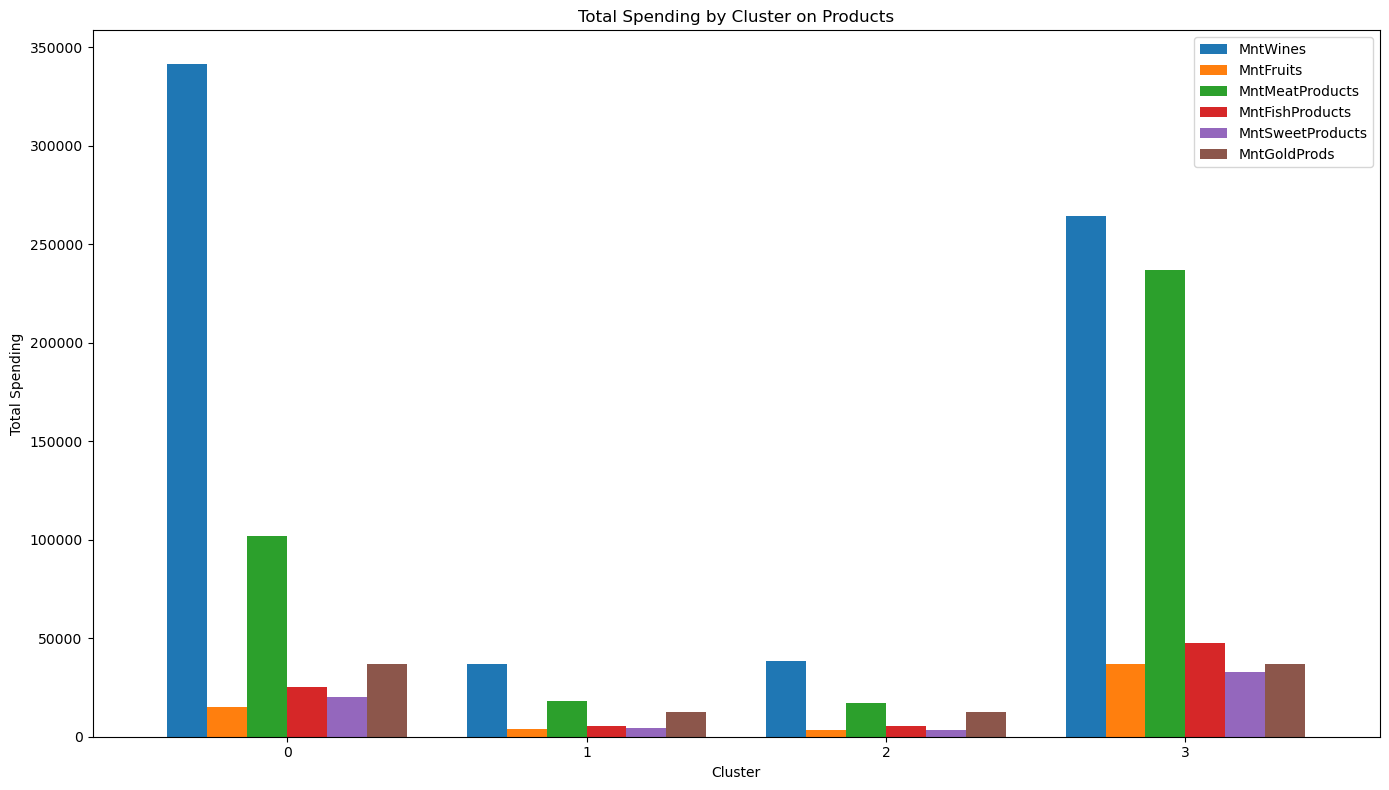

In [31]:

# 3. Visualization of Spending by Product for Each Cluster

# Sum spending for each product by cluster
cluster_spending = df.groupby('Cluster')[product_columns].sum()

# Plot the spending for each cluster by product category
cluster_spending.plot(kind='bar', stacked=False, figsize=(14, 8), width=0.8)

# Add title and labels
plt.title('Total Spending by Cluster on Products')
plt.ylabel('Total Spending')
plt.xlabel('Cluster')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()

## Total Spending by Cluster on Products

### Bar Chart Description
The bar chart titled "Total Spending by Cluster on Products" displays the total spending across various product categories for each customer cluster. The x-axis represents different clusters (0, 1, 2, 3), and the y-axis represents the total spending amount. The products are categorized and color-coded as follows:
- **MntWines** (blue)
- **MntFruits** (orange)
- **MntMeatProducts** (green)
- **MntFishProducts** (red)
- **MntSweetProducts** (purple)
- **MntGoldProds** (brown)

### Insights:

#### Cluster 0:
- **Highest Spending**:
  - Significant spending on MntWines and MntMeatProducts.
  - Moderate spending on other product categories.
  
#### Cluster 1:
- **Lowest Spending**:
  - Relatively low spending across all product categories.
  - Indicates a segment with lower engagement in terms of spending.

#### Cluster 2:
- **Low to Moderate Spending**:
  - Similar spending pattern to Cluster 1, with slightly higher spending in some categories.
  - Overall lower spending compared to Clusters 0 and 3.

#### Cluster 3:
- **High Spending**:
  - High spending on MntWines and MntMeatProducts.
  - Significant spending on other product categories, indicating a high-value segment.

### Summary:
- **Clusters 0 and 3**: These clusters show the highest spending across various product categories, making them prime targets for premium marketing strategies.
- **Clusters 1 and 2**: These clusters exhibit lower spending, suggesting the need for different marketing approaches to increase engagement and spending.

These insights are valuable for market segmentation and targeted marketing strategies, allowing businesses to tailor their efforts based on the spending behaviors of different customer clusters.


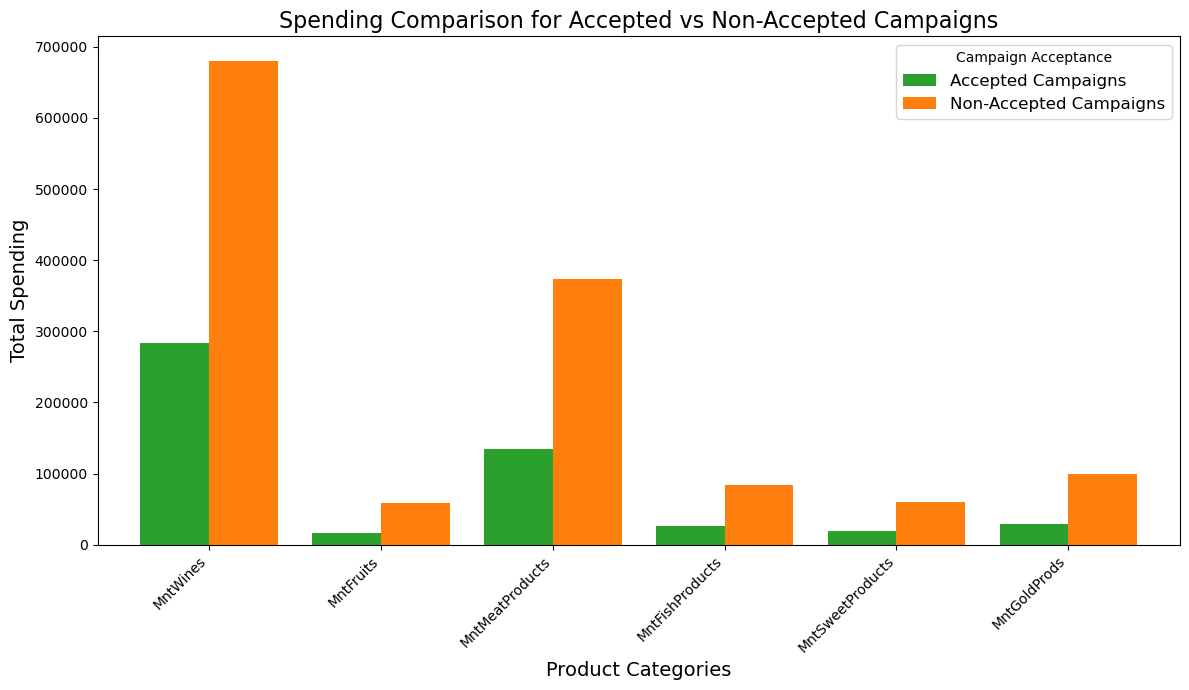

In [32]:

import matplotlib.pyplot as plt

# Define the list of campaigns (you can adjust these based on your dataset)
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# Create a DataFrame to compare spending between accepted vs non-accepted campaigns
spending_comparison = df[campaign_columns + ['MntWines', 'MntFruits', 'MntMeatProducts',
                                             'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Create a new DataFrame to categorize the spending based on acceptance of campaigns
spending_comparison_accepted = spending_comparison[spending_comparison[campaign_columns].eq(1).any(axis=1)]
spending_comparison_non_accepted = spending_comparison[spending_comparison[campaign_columns].eq(0).any(axis=1)]

# Calculate the total spending for each product category
total_spending_accepted = spending_comparison_accepted.drop(columns=campaign_columns).sum()
total_spending_non_accepted = spending_comparison_non_accepted.drop(columns=campaign_columns).sum()

# Create a DataFrame to plot both accepted and non-accepted spending side by side
spending_df = pd.DataFrame({
    'Accepted Campaigns': total_spending_accepted,
    'Non-Accepted Campaigns': total_spending_non_accepted
})

# Plot the spending comparison for accepted vs non-accepted campaigns
plt.figure(figsize=(12, 7))

# Plot bars with different colors for each category
spending_df.plot(kind='bar', width=0.8, color=['#2ca02c', '#ff7f0e'], ax=plt.gca())

# Add title and labels
plt.title('Spending Comparison for Accepted vs Non-Accepted Campaigns', fontsize=16)
plt.ylabel('Total Spending', fontsize=14)
plt.xlabel('Product Categories', fontsize=14)
plt.xticks(rotation=45, ha='right')

# Add a legend to distinguish between accepted and non-accepted campaigns
plt.legend(title='Campaign Acceptance', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Spending Comparison for Accepted vs Non-Accepted Campaigns

### Bar Chart Description
The bar chart titled "Spending Comparison for Accepted vs Non-Accepted Campaigns" compares the total spending across different product categories for accepted and non-accepted campaigns. The product categories are listed on the x-axis, and the total spending is shown on the y-axis.

The product categories include:
- MntWines
- MntFruits
- MntMeatProducts
- MntFishProducts
- MntSweetProducts
- MntGoldProds

The chart uses two colors to differentiate between accepted and non-accepted campaigns:
- **Green bars** represent accepted campaigns.
- **Orange bars** represent non-accepted campaigns.

### Key Observations:
- **MntWines**:
  - Non-accepted campaigns have significantly higher spending compared to accepted campaigns.
  
- **MntMeatProducts**:
  - Accepted campaigns have higher spending than non-accepted campaigns.
  
- **MntFruits, MntFishProducts, MntSweetProducts, and MntGoldProds**:
  - Non-accepted campaigns have higher spending than accepted campaigns, although the differences are less pronounced compared to the MntWines category.

### Summary:
This chart provides insights into how spending varies between accepted and non-accepted campaigns across different product categories. These insights can be useful for marketing and budget allocation strategies, helping businesses understand the effectiveness of their campaigns and adjust their approaches accordingly.


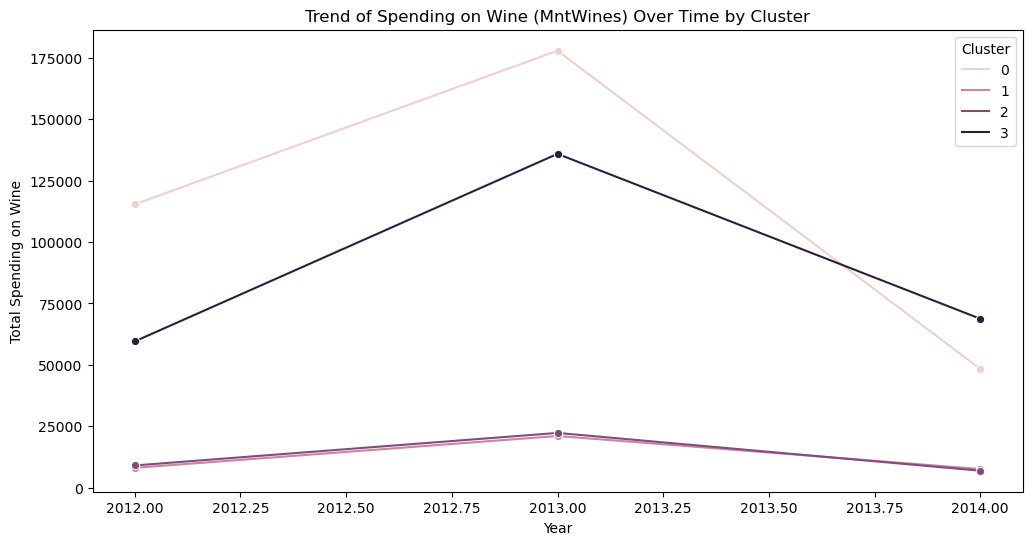

In [33]:

# Convert 'Dt_Customer' to datetime if it's not already
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

# Extract year from 'Dt_Customer'
df['Customer_Year'] = df['Dt_Customer'].dt.year

# Create a DataFrame with spending trends by product and cluster
spending_trends = df.groupby(['Customer_Year', 'Cluster'])[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().reset_index()

# Plot the spending trend over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=spending_trends, x='Customer_Year', y='MntWines', hue='Cluster', marker='o')
plt.title('Trend of Spending on Wine (MntWines) Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('Total Spending on Wine')
plt.legend(title='Cluster')
plt.show()

## Trend of Spending on Wine (MntWines) Over Time by Cluster

### Line Graph Description
The line graph titled "Trend of Spending on Wine (MntWines) Over Time by Cluster" displays the total spending on wine over time for different clusters. The x-axis represents the year, ranging from 2012 to 2014, while the y-axis represents the total spending on wine, ranging from 0 to 200,000. The graph includes four clusters, each represented by a different color:
- **Cluster 0 (light pink)**
- **Cluster 1 (light purple)**
- **Cluster 2 (purple)**
- **Cluster 3 (dark purple)**

### Key Insights:

#### Cluster 0 (light pink):
- Starts at around 125,000 in 2012.
- Peaks at around 175,000 in 2013.
- Declines to around 100,000 by 2014.

#### Cluster 1 (light purple):
- Starts at around 25,000 in 2012.
- Peaks slightly above 25,000 in 2013.
- Declines to around 20,000 by 2014.

#### Cluster 2 (purple):
- Starts at around 50,000 in 2012.
- Peaks at around 100,000 in 2013.
- Declines to around 75,000 by 2014.

#### Cluster 3 (dark purple):
- Starts at around 75,000 in 2012.
- Peaks at around 125,000 in 2013.
- Declines to around 100,000 by 2014.

### Summary:
- **Overall Trends**: All clusters show a similar trend of peaking in 2013, followed by a decline in 2014.
- **Peak Spending Year**: 2013 is the year with the highest wine spending across all clusters.
- **Cluster Comparison**: Cluster 0 and Cluster 3 have the highest total spending, while Clusters 1 and 2 have significantly lower spending.
- **Yearly Decline**: There is a noticeable decline in spending in 2014 for all clusters, suggesting a possible shift in customer behavior or external factors affecting wine purchases.

### Business Implications:
- **Targeted Marketing**: The peak in 2013 indicates a successful period for wine sales. Businesses can analyze the factors contributing to this success and replicate similar strategies.
- **Customer Retention**: The decline in 2014 suggests the need for strategies to retain customers and maintain high spending levels.
- **Cluster-Specific Strategies**: Understanding the spending behavior of different clusters allows businesses to tailor their marketing efforts accordingly, focusing on high-value clusters (Cluster 0 and 3) while finding ways to engage lower-spending clusters (Cluster 1 and 2).

This analysis provides valuable insights into customer spending trends over time, helping businesses make informed decisions for future marketing and sales strategies.


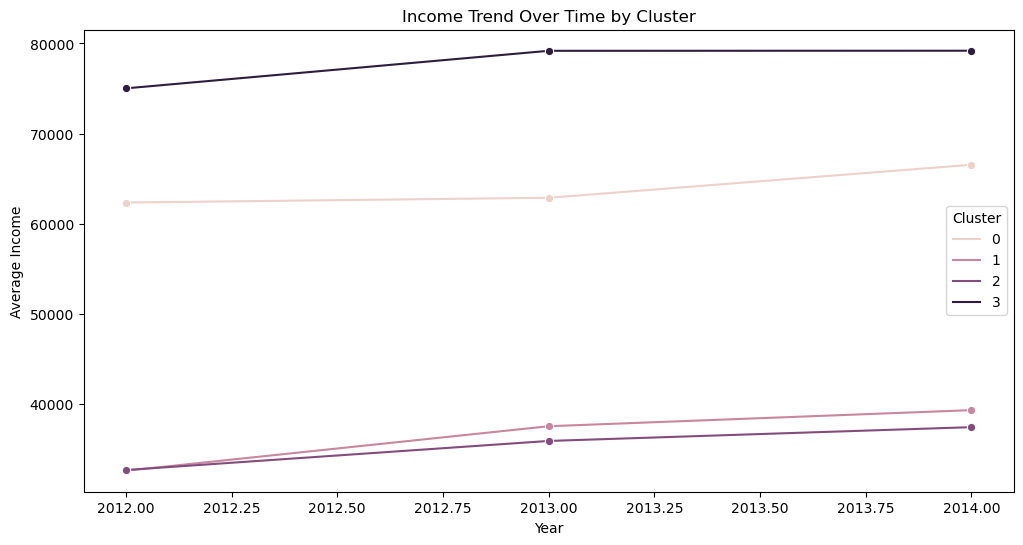

In [34]:
# Group by year and cluster to calculate mean income
income_trends = df.groupby(['Customer_Year', 'Cluster'])['Income'].mean().reset_index()

# Plot the income trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=income_trends, x='Customer_Year', y='Income', hue='Cluster', marker='o')
plt.title('Income Trend Over Time by Cluster')
plt.xlabel('Year')
plt.ylabel('Average Income')
plt.legend(title='Cluster')
plt.show()


## Steps for Churn and Retention Analysis:

### Define Churn and Retention Metrics:

Churn: Customers who have stopped responding to campaigns or have not made recent purchases. These could be identified using Recency, Response, and campaign acceptance data.
Retention: Customers who continue to engage with campaigns or have regular purchases.
Churn Calculation: A common way to calculate churn is by considering whether a customer has responded to any campaign recently or made purchases in the recent time period.

Retention Calculation: Retained customers are those who keep engaging with campaigns (e.g., AcceptedCmp1, AcceptedCmp2, etc.) or maintain purchases (e.g., high spend on products like MntWines, MntFruits, etc.).

Churned (1): Customers who have not accepted any campaign and have a high recency value.
Retained (1): Customers who have accepted at least one campaign and have a low recency value.


In [36]:
# Step 1: Define churn and retention labels based on campaign response and recency
df['Churned'] = np.where(
    (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) == 0) & 
    (df['Recency'] > df['Recency'].median()), 1, 0)  # Churn if no campaign accepted and high recency

df['Retained'] = np.where(
    (df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0) & 
    (df['Recency'] <= df['Recency'].median()), 1, 0)  # Retained if responded to campaigns and low recency


In [39]:
# Churn and retention analysis
churn_rate = df['Churned'].mean()
retention_rate = df['Retained'].mean()

print(f'Churn Rate: {churn_rate * 100:.2f}%')
print(f'Retention Rate: {retention_rate * 100:.2f}%')


Churn Rate: 39.87%
Retention Rate: 10.62%


         MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Churned                                                          
0          472038      37474           248911            54063   
1          208778      21443           125057            29994   

         MntSweetProducts  MntGoldProds  
Churned                                  
0                   38078         62123  
1                   22543         36486  


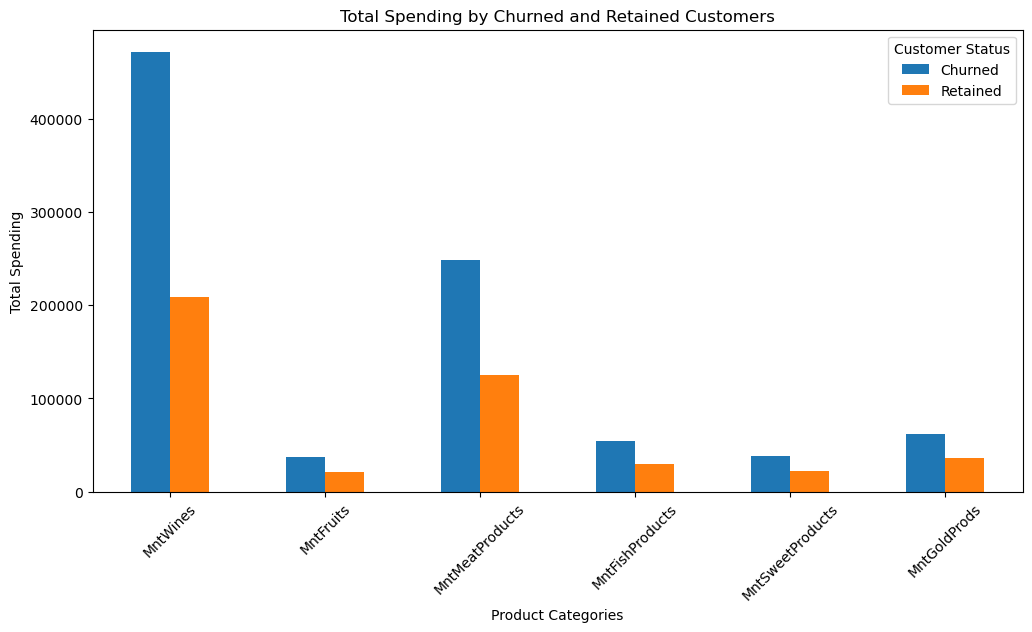

In [40]:
# Spending comparison between churned and retained customers
spending_comparison = df.groupby('Churned')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

print(spending_comparison)

# Plot the spending comparison
spending_comparison.T.plot(kind='bar', figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('Total Spending by Churned and Retained Customers')
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.legend(title='Customer Status', labels=['Churned', 'Retained'])
plt.show()


## Total Spending by Churned and Retained Customers

### Bar Chart Description
The bar chart titled "Total Spending by Churned and Retained Customers" compares the total spending of churned and retained customers across different product categories. The product categories listed on the x-axis are:
- **MntWines**
- **MntFruits**
- **MntMeatProducts**
- **MntFishProducts**
- **MntSweetProducts**
- **MntGoldProds**

The y-axis represents the total spending. The chart uses two colors to differentiate between churned and retained customers:
- **Blue bars** represent churned customers.
- **Orange bars** represent retained customers.

### Key Insights:

#### MntWines:
- **Churned Customers**: Highest spending, significantly more than retained customers.
- **Retained Customers**: Lower spending compared to churned customers.

#### MntFruits:
- **Churned Customers**: Slightly higher spending than retained customers.
- **Retained Customers**: Relatively low spending, similar to churned customers.

#### MntMeatProducts:
- **Churned Customers**: Higher spending compared to retained customers, but the difference is less pronounced than in MntWines.
- **Retained Customers**: Lower spending than churned customers.

#### MntFishProducts:
- **Churned Customers**: Higher spending than retained customers, though both have low spending overall.
- **Retained Customers**: Lower spending than churned customers.

#### MntSweetProducts:
- **Churned Customers**: Higher spending compared to retained customers, but both have relatively low spending.
- **Retained Customers**: Lower spending than churned customers.

#### MntGoldProds:
- **Churned Customers**: Higher spending than retained customers, though both have low spending overall.
- **Retained Customers**: Lower spending compared to churned customers.

### Summary:
- **Higher Spending by Churned Customers**: Churned customers exhibit higher spending across all product categories, particularly in MntWines.
- **Implications**: This trend suggests that high-spending customers are more likely to churn, indicating a potential area for retention efforts. Businesses might consider targeted strategies to retain these high-spending customers, such as personalized offers, loyalty programs, or enhanced customer support.

These insights can help businesses understand the spending behavior of churned versus retained customers and develop strategies to improve customer retention and satisfaction.


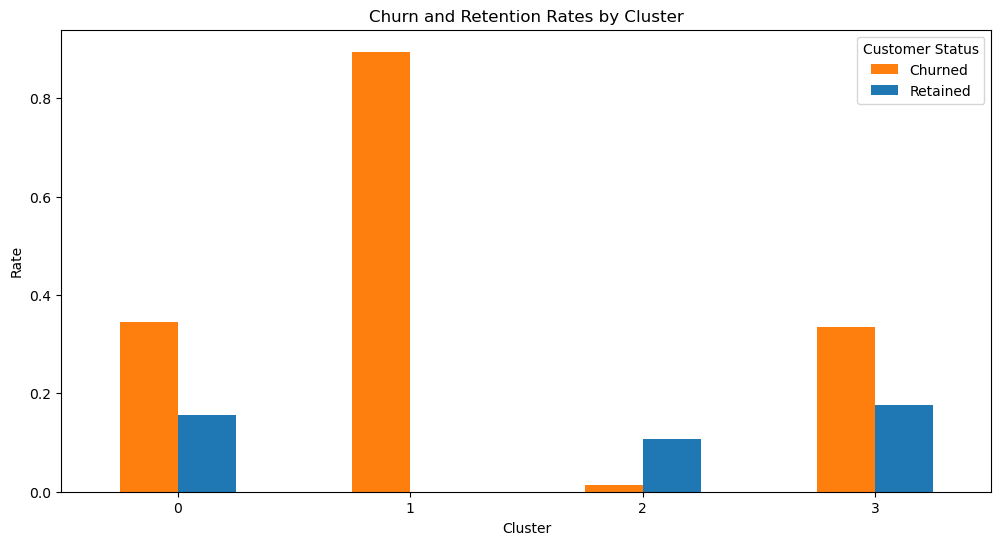

In [41]:
# Group by Cluster and analyze churn and retention rates
cluster_churn_retention = df.groupby('Cluster')[['Churned', 'Retained']].mean()

# Plot churn and retention by cluster
cluster_churn_retention.plot(kind='bar', figsize=(12, 6), color=['#ff7f0e', '#1f77b4'])
plt.title('Churn and Retention Rates by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Rate')
plt.xticks(rotation=0)
plt.legend(title='Customer Status', labels=['Churned', 'Retained'])
plt.show()


## Churn and Retention Rates by Cluster

### Bar Chart Description
The bar chart titled "Churn and Retention Rates by Cluster" displays the rates of churned and retained customers across four different clusters (0, 1, 2, and 3). The y-axis represents the rate, ranging from 0.0 to 1.0, and the x-axis represents the clusters. The chart uses two colors to differentiate between churned (orange) and retained (blue) customers.

### Key Insights:

#### Cluster 0:
- **Churn Rate**: Approximately 0.4
- **Retention Rate**: Approximately 0.2
- **Observation**: A moderate churn rate with a lower retention rate, suggesting this cluster has a mix of churned and retained customers.

#### Cluster 1:
- **Churn Rate**: Approximately 0.9
- **Retention Rate**: Approximately 0.0
- **Observation**: This cluster has a very high churn rate and virtually no retention, indicating a segment with significant customer attrition.

#### Cluster 2:
- **Churn Rate**: Approximately 0.0
- **Retention Rate**: Approximately 0.2
- **Observation**: This cluster shows no churn and a moderate retention rate, highlighting it as a stable segment.

#### Cluster 3:
- **Churn Rate**: Approximately 0.3
- **Retention Rate**: Approximately 0.2
- **Observation**: A moderate churn rate with a comparable retention rate to Cluster 0, indicating a balanced mix of churned and retained customers.

### Summary:
- **High Churn Cluster**: Cluster 1 has the highest churn rate and no retention, requiring immediate attention and retention strategies.
- **Stable Cluster**: Cluster 2 shows no churn and moderate retention, making it a stable and loyal segment.
- **Moderate Clusters**: Clusters 0 and 3 have moderate churn and retention rates, suggesting the need for targeted efforts to improve retention.

### Business Implications:
- **Cluster 1**: Focus on understanding the reasons for high churn and develop strategies to retain these customers, such as personalized offers, improved customer service, and loyalty programs.
- **Cluster 2**: Continue to engage and nurture this stable segment to maintain their loyalty.
- **Clusters 0 and 3**: Implement targeted retention strategies to reduce churn and increase retention rates, ensuring these segments remain engaged and loyal.

Understanding churn and retention rates by cluster helps businesses tailor their customer retention strategies to address the specific needs and behaviors of each segment, ultimately improving overall customer loyalty and reducing attrition.
